- XGBoost 버전확인

In [1]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 5.3 MB/s eta 0:00:00


In [2]:
import xgboost

print(xgboost.__version__)

1.7.5


XGBoost의 scikit-learn 래퍼 클래스의 주요 하이퍼파라미터

- n_estimators: 부스트 트리의 개수를 결정합니다. 너무 큰 값은 오버피팅을 유발할 수 있습니다.
- learning_rate (eta): 각 트리의 가중치를 줄이는 역할을 합니다. 일반적으로 더 낮은 학습률은 더 많은 트리를 필요로 합니다.
- max_depth: 각 트리의 최대 깊이를 결정합니다. 이 값이 크면 모델은 복잡해지고 오버피팅 될 수 있습니다.
- min_child_weight: 트리에서 가지를 분할하기 위한 최소 가중치 합입니다. 이 값이 크면 모델은 보수적으로 학습합니다.
- subsample: 각 트리를 훈련시키기 위해 사용하는 데이터 샘플의 비율입니다. 이 값이 작으면 오버피팅을 피하는 데 도움이 될 수 있습니다.
- colsample_bytree: 각 트리를 훈련시키는 데 사용되는 열(특성)의 비율입니다.
- gamma: 리프 노드를 추가적으로 분할할 최소 손실 감소입니다. 이 값이 높을수록 모델은 보수적으로 학습합니다.
- reg_lambda (lambda): L2 정규화 가중치입니다.
- reg_alpha (alpha): L1 정규화 가중치입니다
- learning_rate (eta): 각 부스팅 단계 축소를 제어합니다. 이는 새로운 트리가 추가될 때 각각에 부여되는 가중치를 조정하는 데 사용되며, 일반적으로 0과 1 사이의 값을 가집니다. 이 값이 낮을수록 모델은 보수적으로 학습하며, 이는 더 많은 부스팅 단계를 필요로 할 수 있습니다. 이 값이 높을수록 모델은 더욱 강하게 학습하지만, 너무 높은 값은 오버피팅을 초래할 수 있습니다.

## 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [4]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df + pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [7]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train,y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)
print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [ ]:
def get_clf_eval(y_test, pred, pred_proba):

## 사이킷런 래퍼 XGBoost의 개요 및 적용

In [41]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall =recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-ACU print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, \
    F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [47]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도:0.9737, 정밀도:0.9744, 재현율:0.9870,     F1:0.9806, AUC:0.9951


early_stopping_rounds
- XGBoost의 하이퍼파라미터는 아니지만, 학습 과정을 제어하는 중요한 매개변수 중 하나입니다. 이 매개변수는 validation set에 대한 모델의 성능이 개선되지 않을 경우 학습을 조기 종료하는 데 사용
- 설정한 라운드 수만큼 동안 검증 오차(validation error)가 감소하지 않을 경우에 학습이 조기에 중지됩니다. 이는 더 이상 학습이 진전되지 않거나 오버피팅이 시작되는 것을 방지하는 데 도움

eval_metric은 XGBoost 모델을 학습하면서 사용할 평가 지표를 지정하는 매개변수
- rmse: Root Mean Square Error
- mae: Mean Absolute Error
- logloss: Negative log-likelihood
- error: Binary classification error rate (0.5 threshold)
- auc: Area under the curve for both binary and multiclass classification
- mlogloss: Multiclass logloss
- merror: Multiclass classification error rate

In [18]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="logloss",
               eval_set=evals, verbose=True)

ws100_preds =xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [ ]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

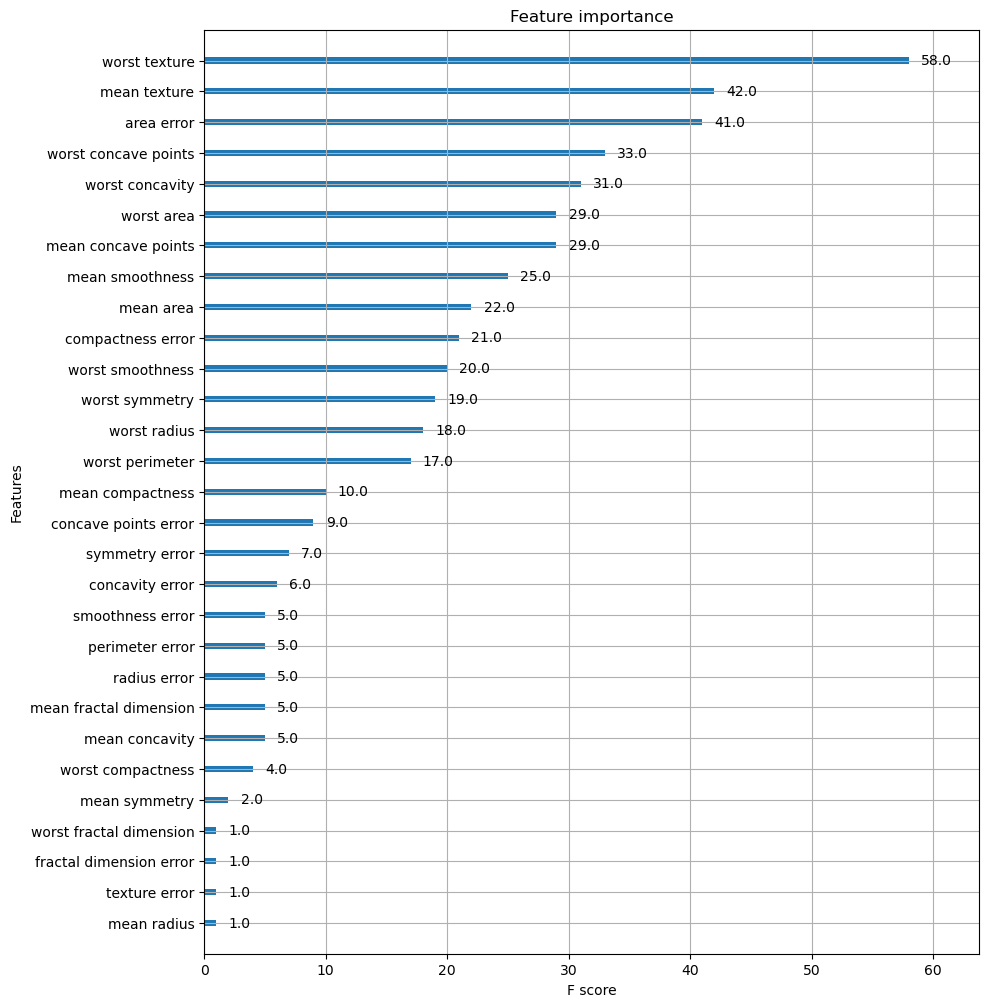

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)

박주경 : 남동연 김예슬 오윤택 조차선
김동완 : 손아 한나영 김성호 윤예은
최정인 : 윤정현 김나영 김태현 박서진 이승주
정슬기 : 장인혁 임수현 옥유리 옥주리 김용훈